# CTMaging for Gate Simulation 

In [1]:
import dicom
import os
import numpy
import vtk
from vtk.util import numpy_support
from matplotlib import pyplot, cm
%pylab inline
from natsort import natsorted
import plotly
from vtk.util import vtkImageImportFromArray as viifa 
import array


Populating the interactive namespace from numpy and matplotlib


# Read DICOM CT scan 

## With pydicom
####  --> use os.path.walk to  traverse CT scan directory and create a list of dicom file 'listFilesDCM'
####  --> use the first of DICOM files to read insome metadata, specify the image dimensions, the pixel spacind and slice thicknes/ a dicom.dataset.FileDataset object where diferrent metadata is created and asign to a DICOM file when this one is read
#### --> Create axis based on the image dimension
#### --> Create an empty  array 'ArrayDicom' based on 'ConstPixelDims' 
#### --> read all the file of 'listFilesDCM' and and fill 'ArrayDicom' with  pixel_array of each dicom file

In [250]:
PathDicom = "./scanRA1/"
listFilesDCM =[]
for dirName, subdirlist, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower(): #check wether the file is DICOM
            listFilesDCM.append(os.path.join(dirName,filename))
#to get th roght image order       
listFilesDCM=natsorted(listFilesDCM)           
print listFilesDCM


['./scanRA1/001.dcm', './scanRA1/002.dcm', './scanRA1/003.dcm', './scanRA1/004.dcm', './scanRA1/005.dcm', './scanRA1/006.dcm', './scanRA1/007.dcm', './scanRA1/008.dcm', './scanRA1/009.dcm', './scanRA1/010.dcm', './scanRA1/011.dcm', './scanRA1/012.dcm', './scanRA1/013.dcm', './scanRA1/014.dcm', './scanRA1/015.dcm', './scanRA1/016.dcm', './scanRA1/017.dcm', './scanRA1/018.dcm', './scanRA1/019.dcm', './scanRA1/020.dcm', './scanRA1/021.dcm', './scanRA1/022.dcm', './scanRA1/023.dcm', './scanRA1/024.dcm', './scanRA1/025.dcm', './scanRA1/026.dcm', './scanRA1/027.dcm', './scanRA1/028.dcm', './scanRA1/029.dcm', './scanRA1/030.dcm', './scanRA1/031.dcm', './scanRA1/032.dcm', './scanRA1/033.dcm', './scanRA1/034.dcm', './scanRA1/035.dcm', './scanRA1/036.dcm', './scanRA1/037.dcm', './scanRA1/038.dcm', './scanRA1/039.dcm', './scanRA1/040.dcm', './scanRA1/041.dcm', './scanRA1/042.dcm', './scanRA1/043.dcm', './scanRA1/044.dcm', './scanRA1/045.dcm', './scanRA1/046.dcm', './scanRA1/047.dcm', './scanRA1/0

In [251]:
#Get ref file
RefDs = dicom.read_file(listFilesDCM[0])
print RefDs.filename
#Load dimensions based on the number os raws; columns and slices (along z axis)
ConstPixelDims = (int(RefDs.Rows) , int(RefDs.Columns), len(listFilesDCM))
print "Dicom Dimensions :"
print ConstPixelDims

#Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))
print "Pixel Dimensions :"
print ConstPixelSpacing

./scanRA1/001.dcm
Dicom Dimensions :
(512, 512, 136)
Pixel Dimensions :
(0.976562, 0.976562, 2.5)


In [252]:
#Create axis (start, stop, step)

x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[0], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[0], ConstPixelSpacing[2])
#print x
#print y 
#print z

In [253]:
#The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
#print ArrayDicom

#loop through all Dicom files
for filenameDCM in listFilesDCM:
    #read the filee
    ds = dicom.read_file(filenameDCM)
    #store the raw image data
    ArrayDicom[:, :, listFilesDCM.index(filenameDCM)] = ds.pixel_array
print type(ArrayDicom)
#print ArrayDicom

<type 'numpy.ndarray'>


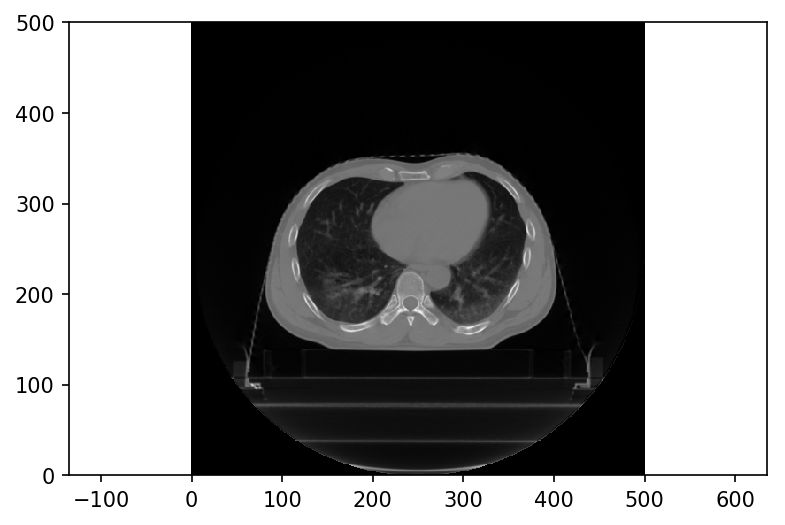

In [254]:
pyplot.figure(dpi=150)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 80]))

## Reading Dicom through VTK

In [32]:
PathDicom = "./scanRA1/"
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()
# !!!! Suerement problème with lexicographical sorted filename --> messed up array To check

In [219]:
####Johnatan Example

#DICOMDims = reader.GetOutput().GetDimensions()
#DICOMPixelDims = reader.GetDataSpacing()
#VolumeVoxel=DICOMPixelDims[0]*DICOMPixelDims[1]*DICOMPixelDims[2]*1e-9 #en m3

#Transformation du DICOM AI en numpy

#pointData = reader.GetOutput().GetPointData()
#assert (pointData.GetNumberOfArrays()==1)
#arrayData = pointData.GetArray(0)
#GrosseMatrice = numpy_support.vtk_to_numpy(arrayData)
#GrosseMatrice = GrosseMatrice.reshape(DICOMDims, order='F')
#GrosseMatrice = GrosseMatrice.astype(float)


#Write raw File with VTK

##T2 = viifa.vtkImageImportFromArray()
#T2.SetArray(ArrayDicom)
#T2.SetDataSpacing(DicompixelSize)
#T2.SetDataExtent([0,DicomSize[0], 0,DicomSize[1],0,DicomSize[2]])
#T2.Update()
#Convolution = T2.GetOutput()


#Ecriture
##imageWriter = vtk.vtkMetaImageWriter()
#imageWriter.SetCompression(False)
#imageWriter.SetFileName("/home/crct/CRCT/JupyterNotebook/CT/test2.mhd")
#imageWriter.SetInputData(Convolution)
#imageWriter.Write()
#[0,DicomSize[0], 0,DicomSize[1],0,DicomSize[2]]


In [33]:

#Load dimensions using 'GetdataExtent'
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]
print "ConstPixelDims :"
print ConstPixelDims

#Load sapcing values
ConstPixelSpacing = reader.GetPixelSpacing()
print "ConstPixelSpacing :"
print ConstPixelSpacing





ConstPixelDims :
[512, 512, 136]
ConstPixelSpacing :
(0.9765620231628418, 0.9765620231628418, 2.5)


In [34]:
#User ConstPixelDims and ConstPixelSpacing to create axes for this array

x = numpy.arange(0.0,(ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

#print (x.max()/2)-(ConstPixelSpacing[0]/2)

In [35]:
#Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()

#Get the 'vtkPointData' forom the 'vtkImagedata' object
pointData = imageData.GetPointData()

#Ensure that only one array exist within the 'vtkPoint Data object
assert (pointData.GetNumberOfArrays()==1)

#get the 'vtkArray' (or whatever drived type) which is nedded for  the numpy_support.vtk_to_numpy` function
arrayData=pointData.GetArray(0)

#get the 'vtkArray' to Numpy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)

#reshape the Numpy array 3D usin 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')

DicomSize=reader.GetOutput().GetDimensions()
DicompixelSize=reader.GetDataSpacing()

print 'Dicom Size :'
print DicomSize
print 'Dicom Pixel Size'
print DicompixelSize

# FLIP ARRAY TO HAVE A DORSAL RECUMBENCY 
arrayDicom=numpy.fliplr(ArrayDicom)



Dicom Size :
(512, 512, 136)
Dicom Pixel Size
(0.9765620231628418, 0.9765620231628418, 2.5)


In [42]:
#Isocenter Position calcul

#Calcul de la position de l'origine (milieu du voxel au coin supérieur gauche de l'iamge) de l'image 
#pour que celle-ci coincide avec l'orgine dans le refentiel de GATE (milieu du WORLD)
originGATEref=[]
originGATEref.append(((DicomSize[0]/2)*DicompixelSize[0])-(DicompixelSize[0]/2))
originGATEref.append((((DicomSize[1]/2)*DicompixelSize[1])-(DicompixelSize[1]/2))*-1) # *(-1) because rotation around x axis in GATE to have dorsal recumbency
originGATEref.append((((DicomSize[2]/2)*DicompixelSize[2])-(DicompixelSize[2]/2))*-1) # *(-1) because rotation around x axis in GATE to have dorsal recumbency

print "coordonées pour que l'origine de l'image (ref image) soit à 0 0 0 dans le référentiel GATE :"
print originGATEref

#Isocenter position in image ref
#Get from RT plan reader 
isoIMGref=[]
a=-40
b=-23.037973128101
c=-10

isoIMGref.append(a)
isoIMGref.append(b)
isoIMGref.append(c)

print "Coordonée de l'isocentre RTplan (ref image):"
print isoIMGref


isoGATEref=[]
isoGATEref.append(originGATEref[0]+isoIMGref[0])
isoGATEref.append(originGATEref[1]+isoIMGref[1])
isoGATEref.append(originGATEref[2]+isoIMGref[2])
a=249.51159691810608-40
b=-249.51159691810608-23.0379731281013
c=-168.75-10

print "translation à réaliser pour que l'isocentre de l'image soit à 0 0 0 dans le référentiel GATE: (With TranlateToIsocenter)"
print isoGATEref 
numpy.savetxt('isocenterGateCTpos.txt', isoGATEref)

coordonées pour que l'origine de l'image (ref image) soit à 0 0 0 dans le référentiel GATE :
[249.51159691810608, -249.51159691810608, -168.75]
Coordonée de l'isocentre RTplan (ref image):
[-40, -23.037973128101, -10]
translation à réaliser pour que l'isocentre de l'image soit à 0 0 0 dans le référentiel GATE: (With TranlateToIsocenter)
[209.51159691810608, -272.54957004620707, -178.75]


In [37]:
# CROP CT scan for GATE simulation
import plotly.offline as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)


meanRowsValues=numpy.mean(arrayDicom, axis=0)
meanColumnsValues=numpy.mean(arrayDicom, axis=1)

SuM_CT=numpy.zeros((DicomSize[0], DicomSize[1]))
for k in range(0, DicomSize[2]):
    SuM_CT = SuM_CT + arrayDicom[: ,: , k]

meanA=numpy.mean(SuM_CT, axis=0)
meanB=numpy.mean(SuM_CT, axis=1)

#print max(meanA)
#print max(meanB)

thresholdA = max(meanA)/0.35
thresholdB = max(meanB)/0.56

for i in range(0, len(meanA)):
    if meanA[i]>thresholdA:
        y1_crop=i-20  #ventre
        break

for i in range(len(meanA)-1, -1, -1):
    if meanA[i]>thresholdA:
        y2_croptemp=i-60  # suppression d'une partie de la table 
        break

for i in range(0, len(meanB)):
    if meanB[i]>thresholdB:
        x1_crop=i-20  #gauche de l'image
        break
        
for i in range(len(meanB)-1, -1, -1):
    if meanB[i]>thresholdB:
        x2_croptemp=i+20  #droite de l'image
        break
        

x1 = numpy.arange(0, len(meanA))
x2 =  numpy.arange(0, len(meanB))


trace1 = go.Scatter(
    x = x1,
    y = meanA,
    mode = 'lines', 
    name = 'meanA')

trace2 = go.Scatter(
    x = x2,
    y = meanB,
    mode = 'lines', 
    name = 'meanB')

data = [trace1, trace2]
py.iplot(data, filename='scatter-mode')

x2_crop=x2_croptemp-DicomSize[0]
y2_crop=y2_croptemp-DicomSize[1]





-46121.1015625
-72200.25


In [38]:
#Write a Binary File 

crop_img=arrayDicom[x1_crop:x2_crop, y1_crop:y2_crop]
print crop_img.shape

datacrop = crop_img.flatten('F')


filename = 'CT_crop1'
binfile = filename + '.raw'
bitas = array.array('h', datacrop)
print binfile 
with open(binfile, 'wb') as file:
    file.write(bitas)

mhdFile = filename + '.mhd'
print mhdFile

with open(mhdFile, 'wt') as file:
    file.write('ObjectType = Image\n')
    file.write('NDims = ' + str(len(crop_img.shape)) + '\n')
    file.write('BinaryData = True\n')
    file.write('BinaryDataByteOrderMSB = False\n')
    file.write('CompressedData = False\n')
    file.write('TransformMatrix = 1 0 0 0 1 0 0 0 1\n')
    file.write('Offset = 0 0 0\n')
    file.write('CenterOfRotation = 0 0 0\n')
    file.write('ElementSpacing = ' + str(crop_img.shape[0]) +' '+ str(crop_img.shape[1]) +' '+ str(crop_img.shape[2]) +'\n')
    file.write('DimSize = ' + str(DicomSize[0]) +' '+ str(DicomSize[1]) +' '+ str(DicomSize[2]) + '\n')
    file.write('ElementType = MET_SHORT\n')
    file.write('ElementDataFile = ' + binfile)

(441, 331, 136)
CT_crop1.raw
CT_crop1.mhd


In [10]:
#write binary file 

#data = np.zeros((DicomSize), dtype=np.int)
data = arrayDicom.flatten('F')

print type(data)

filename = 'CT1'
binfile = filename + '.raw'
bitas = array.array('h', data)
print binfile 
with open(binfile, 'wb') as file:
    file.write(bitas)

mhdFile = filename + '.mhd'
print mhdFile

with open(mhdFile, 'wt') as file:
    file.write('ObjectType = Image\n')
    file.write('NDims = ' + str(len(DicomSize)) + '\n')
    file.write('BinaryData = True\n')
    file.write('BinaryDataByteOrderMSB = False\n')
    file.write('CompressedData = False\n')
    file.write('TransformMatrix = 1 0 0 0 1 0 0 0 1\n')
    file.write('Offset = 0 0 0\n')
    file.write('CenterOfRotation = 0 0 0\n')
    file.write('ElementSpacing = ' + str(DicompixelSize[0]) +' '+ str(DicompixelSize[1]) +' '+ str(DicompixelSize[2]) +'\n')
    file.write('DimSize = ' + str(DicomSize[0]) +' '+ str(DicomSize[1]) +' '+ str(DicomSize[2]) + '\n')
    file.write('ElementType = MET_SHORT\n')
    file.write('ElementDataFile = ' + binfile)

<type 'numpy.ndarray'>
CT1.raw
CT1.mhd


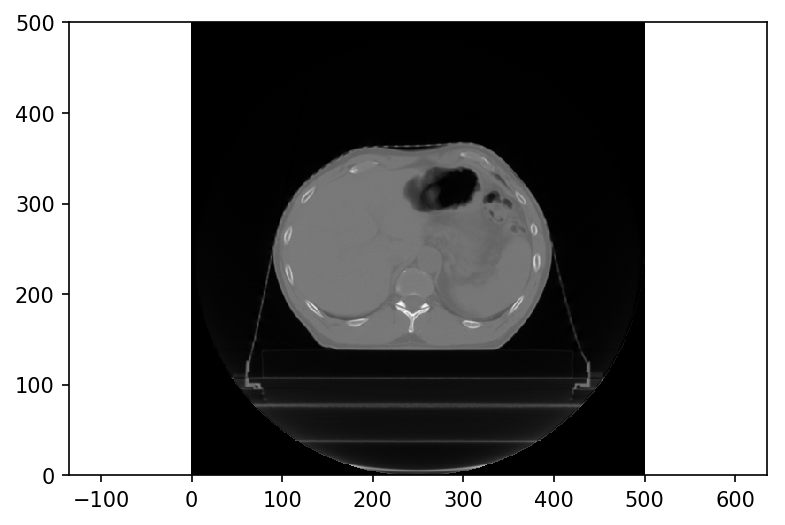

In [11]:
pyplot.figure(dpi=150)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, rot90(arrayDicom[:, :, 110]))


# TOOLS 

## Create Raw file 

In [61]:
RawReader=vtk.vtkMetaImageReader()
RawReader.SetFileName("/home/crct/CRCT/work/tb/fullCreator/CT/data/CT.mhd")
RawReader.Update()
RawSize=RawReader.GetOutput().GetDimensions()
RawPixelSize=RawReader.GetDataSpacing()

raw_pointData=RawReader.GetOutput().GetPointData()

assert (raw_pointData.GetNumberOfArrays()==1)
arrayRawData=raw_pointData.GetArray(0)
RawMatrix =numpy_support.vtk_to_numpy(arrayRawData)
RawMatrix=RawMatrix.reshape(RawSize,order='F')
RawMatrix=RawMatrix.astype(float)
print RawSize
print RawPixelSize
#print RawMatrix
print ("Dimension <nbr pixel x> <nbr pixzel y> <nbr pixel z> : "+str(RawSize))
print ("Taille du pixel <x> <y> <z> : " +str(RawPixelSize))

raworigin=RawReader.GetOutput().GetOrigin()
rawextent= RawReader.GetOutput().GetExtent()
rawbounds= RawReader.GetOutput().GetBounds()
print ("origin : "+str(raworigin))
print ("extent : "+str(rawextent))
print ("bounds : "+str(rawbounds))

print
print
# TRY to write a raw 

print type(arrayDicom)
arrayDicomShape = arrayDicom.shape
print arrayDicomShape

vtkArray = numpy_support.numpy_to_vtk(num_array=arrayDicom.ravel(), deep=True, array_type=vtk.VTK_FLOAT)
print (type(vtkArray))

#a=vtkArray.GetOutput()

print 
print

T2 = viifa.vtkImageImportFromArray()
T2.SetArray(RawMatrix)
T2.SetDataSpacing(RawPixelSize)
T2.SetDataExtent([0,RawSize[0]-1, 0,RawSize[1]-1,0,RawSize[2]-1])
T2.Update()
Convolution = T2.GetOutput()


#Ecriture
imageWriter = vtk.vtkMetaImageWriter()
imageWriter.SetCompression(False)
imageWriter.SetFileName("/home/crct/CRCT/JupyterNotebook/CT/test.mhd")
imageWriter.SetInputData(Convolution)
imageWriter.Write()

T2 = viifa.vtkImageImportFromArray()
T2.SetArray(ArrayDicom)
T2.SetDataSpacing(DicompixelSize)
T2.SetDataExtent([0,DicomSize[0]-1, 0,DicomSize[1]-1,0,DicomSize[2]-1])
T2.Update()
Convolution = T2.GetOutput()


#Ecriture
imageWriter = vtk.vtkMetaImageWriter()
imageWriter.SetCompression(False)
imageWriter.SetFileName("/home/crct/CRCT/JupyterNotebook/CT/test2.mhd")
imageWriter.SetInputData(Convolution)
imageWriter.Write()

print 'fini'

(512, 512, 136)
(0.9765620231628418, 0.9765620231628418, 2.5)
Dimension <nbr pixel x> <nbr pixzel y> <nbr pixel z> : (512, 512, 136)
Taille du pixel <x> <y> <z> : (0.9765620231628418, 0.9765620231628418, 2.5)
origin : (0.0, 0.0, 0.0)
extent : (0, 511, 0, 511, 0, 135)
bounds : (0.0, 499.02319383621216, 0.0, 499.02319383621216, 0.0, 337.5)


<type 'numpy.ndarray'>
(512, 512, 136)
<type 'vtkobject'>


fini


In [53]:
arrayDicom.min()
[0,RawSize[0], 0,RawSize[1],0,RawSize[2]]

[0, 512, 0, 512, 0, 136]

# TEST FOR SLICES VISIUALIZATION

In [252]:

import plotly.offline as py
from plotly.grid_objs import Grid, Column

import time
import numpy as np

from skimage import io

In [253]:
vol = io.imread("OutRawFile.tif")
volume = vol.T.T
r, c = volume[0].shape
#print vol
#print volume[0].shape
print "rows : " + str(r)
print "columns : " +str(c)

rows : 512
columns : 512


In [254]:
pl_bone = [
    [0.0, 'rgb(0, 0, 0)'],
    [0.05, 'rgb(10, 10, 14)'],
    [0.1, 'rgb(21, 21, 30)'],
    [0.15, 'rgb(33, 33, 46)'],
    [0.2, 'rgb(44, 44, 62)'],
    [0.25, 'rgb(56, 55, 77)'],
    [0.3, 'rgb(66, 66, 92)'],
    [0.35, 'rgb(77, 77, 108)'],
    [0.4, 'rgb(89, 92, 121)'],
    [0.45, 'rgb(100, 107, 132)'],
    [0.5, 'rgb(112, 123, 143)'],
    [0.55, 'rgb(122, 137, 154)'],
    [0.6, 'rgb(133, 153, 165)'],
    [0.65, 'rgb(145, 169, 177)'],
    [0.7, 'rgb(156, 184, 188)'],
    [0.75, 'rgb(168, 199, 199)'],
    [0.8, 'rgb(185, 210, 210)'],
    [0.85, 'rgb(203, 221, 221)'],
    [0.9, 'rgb(220, 233, 233)'],
    [0.95, 'rgb(238, 244, 244)'],
    [1.0, 'rgb(255, 255, 255)']
]

In [255]:
my_columns = []
nr_frames = 136
for k in range(nr_frames):
    my_columns.extend(
        [Column((13.5 - k * 0.1) * np.ones((r, c)), 'z{}'.format(k + 1)),
         Column(np.flipud(volume[135 - k]), 'surfc{}'.format(k + 1))]
    )
grid = Grid(my_columns)
print len(my_columns)
print my_columns
#print my_columns[1]
print type(my_columns)
a=np.ones((r,c))
print a
print len(a)
print a.shape
print 'z{}'.format(k + 1)
#py.grid_ops.upload(grid, 'anim_sliceshead'+str(time.time()), auto_open=False)

272
[Column("[[ 13.5  13.5  13.5 ...,  13.5  13.5  13.5]
 [ 13.5  13.5  13.5 ...,  13.5  13.5  13.5]
 [ 13.5  13.5  13.5 ...,  13.5  13.5  13.5]
 ..., 
 [ 13.5  13.5  13.5 ...,  13.5  13.5  13.5]
 [ 13.5  13.5  13.5 ...,  13.5  13.5  13.5]
 [ 13.5  13.5  13.5 ...,  13.5  13.5  13.5]]", z1), Column("[[31768 31768 31768 ..., 31768 31768 31768]
 [31768 31768 31768 ..., 31768 31768 31768]
 [31768 31768 31768 ..., 31768 31768 31768]
 ..., 
 [31768 31768 31768 ..., 31768 31768 31768]
 [31768 31768 31768 ..., 31768 31768 31768]
 [31768 31768 31768 ..., 31768 31768 31768]]", surfc1), Column("[[ 13.4  13.4  13.4 ...,  13.4  13.4  13.4]
 [ 13.4  13.4  13.4 ...,  13.4  13.4  13.4]
 [ 13.4  13.4  13.4 ...,  13.4  13.4  13.4]
 ..., 
 [ 13.4  13.4  13.4 ...,  13.4  13.4  13.4]
 [ 13.4  13.4  13.4 ...,  13.4  13.4  13.4]
 [ 13.4  13.4  13.4 ...,  13.4  13.4  13.4]]", z2), Column("[[31768 31768 31768 ..., 31768 31768 31768]
 [31768 31768 31768 ..., 31768 31768 31768]
 [31768 31768 31768 ..., 31768 317

In [257]:
data=[
    dict(
        type='surface', 
        zsrc=grid.get_column_reference('z1'),
        surfacecolorsrc=grid.get_column_reference('surfc1'),
        colorscale=pl_bone,
        colorbar=dict(thickness=20, ticklen=4)
    )
]

frames=[]
for k in range(nr_frames):
    frames.append(
        dict(
           # data=[dict(zsrc=grid.get_column_reference('z{}'.format(k + 1)),
                       #surfacecolorsrc=grid.get_column_reference('surfc{}'.format(k + 1)))],
            data=[arrayDicom[:, :, k]],
            name='frame{}'.format(k + 1)
        )
    
    )
#print frames
sliders=[
    dict(
        steps=[dict(method='animate',
                    args= [['frame{}'.format(k + 1)],
                            dict(mode='immediate',
                                 frame= dict(duration=70, redraw= False),
                                 transition=dict(duration=0))],
                    label='{:d}'.format(k+1)) for k in range(136)], 
        transition= dict(duration=0),
        x=0,
        y=0, 
        currentvalue=dict(font=dict(size=12), 
                          prefix='slice: ', 
                          visible=True, 
                          xanchor='center'
                         ),  
        len=1.0
    )
]
#print sliders
axis3d = dict(
    showbackground=True, 
    backgroundcolor="rgb(230, 230,230)",
    gridcolor="rgb(255, 255, 255)",      
    zerolinecolor="rgb(255, 255, 255)",  
)

layout3d = dict(
         title='Slices in volumetric data', 
         font=dict(family='Balto'),
         width=600,
         height=600,
         scene=dict(xaxis=(axis3d),
                    yaxis=(axis3d), 
                    zaxis=dict(axis3d, **dict(range=[-0.1, 13.6], autorange=False)), 
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus=[
             dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=1.3,
                  xanchor='right',
                  yanchor='top',
                  pad=dict(t=0, r=10),
                  buttons=[dict(label='Play',
                                method='animate',
                                args=[
                                    None, 
                                    dict(frame=dict(duration=70, redraw=False),
                                         transition=dict(duration=0),
                                         fromcurrent=True,
                                         mode='immediate')
                                ])])
         ],
        sliders=sliders
)
#print layout3d
#print data

In [250]:

figure = {
    'data': [],
    'layout': {},
    'frames': []
}

data_dict={
    
        'values' : (arrayDicom[:, :, 0]),
        'colorscale' : pl_bone,
        'colorbar' : dict(thickness=20, ticklen=4)   
}

figure['data'].append(data_dict)

for k in range(nr_frames):
    frame={'data': [], 'slice' : str(k)}
    data_dict={
        'values' : (arrayDicom[:, :, k]),
        'colorscale' : pl_bone,
        'colorbar' : dict(thickness=20, ticklen=4)      
        },
    frame['data'].append(data_dict)
    
    figure['frames'].append(frame)
        
    sliders=[
        dict(
            steps=[dict(method='animate',
                        args= [['frame{}'.format(k + 1)],
                                dict(mode='immediate',
                                     frame= dict(duration=70, redraw= False),
                                     transition=dict(duration=0))],
                        label='{:d}'.format(k+1)) for k in range(136)], 
            transition= dict(duration=0),
            x=0,
            y=0, 
            currentvalue=dict(font=dict(size=12), 
                              prefix='slice: ', 
                              visible=True, 
                              xanchor='center'
                             ),  
            len=1.0
        )
    ]
#print sliders
axis3d = dict(
    showbackground=True, 
    backgroundcolor="rgb(230, 230,230)",
    gridcolor="rgb(255, 255, 255)",      
    zerolinecolor="rgb(255, 255, 255)",  
)

layout3d = dict(
         title='Slices in volumetric data', 
         font=dict(family='Balto'),
         width=600,
         height=600,
         scene=dict(xaxis=(axis3d),
                    yaxis=(axis3d), 
                    zaxis=dict(axis3d, **dict(range=[-0.1, 13.6], autorange=False)), 
                    aspectratio=dict(x=1, y=1, z=1),
                    ),
         updatemenus=[
             dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=1.3,
                  xanchor='right',
                  yanchor='top',
                  pad=dict(t=0, r=10),
                  buttons=[dict(label='Play',
                                method='animate',
                                args=[
                                    None, 
                                    dict(frame=dict(duration=70, redraw=False),
                                         transition=dict(duration=0),
                                         fromcurrent=True,
                                         mode='immediate')
                                ])])
         ],
        sliders=sliders
)
#print layout3d
#print data

In [258]:
fig=dict(data=data, layout=layout3d, frames=frames)
py.plot(fig, filename='animslicesCT'+str(time.time())+'.html')

'file:///media/sf_CRCT/JupyterNotebook/CT/animslicesCT1515580929.61.html'

In [192]:
import plotly.offline as py

py.plot([{
    'z': [
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    ],
    'type': 'heatmap',
    'colorscale': [
        # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
        [0, 'rgb(0, 0, 0)'],
        [0.1, 'rgb(0, 0, 0)'],

        # Let values between 10-20% of the min and max of z
        # have color rgb(20, 20, 20)
        [0.1, 'rgb(20, 20, 20)'],
        [0.2, 'rgb(20, 20, 20)'],

        # Values between 20-30% of the min and max of z
        # have color rgb(40, 40, 40)
        [0.2, 'rgb(40, 40, 40)'],
        [0.3, 'rgb(40, 40, 40)'],

        [0.3, 'rgb(60, 60, 60)'],
        [0.4, 'rgb(60, 60, 60)'],

        [0.4, 'rgb(80, 80, 80)'],
        [0.5, 'rgb(80, 80, 80)'],

        [0.5, 'rgb(100, 100, 100)'],
        [0.6, 'rgb(100, 100, 100)'],

        [0.6, 'rgb(120, 120, 120)'],
        [0.7, 'rgb(120, 120, 120)'],

        [0.7, 'rgb(140, 140, 140)'],
        [0.8, 'rgb(140, 140, 140)'],

        [0.8, 'rgb(160, 160, 160)'],
        [0.9, 'rgb(160, 160, 160)'],

        [0.9, 'rgb(180, 180, 180)'],
        [1.0, 'rgb(180, 180, 180)']
    ],
    'colorbar': {
        'tick0': 0,
        'dtick': 1
    }
}], filename='heatmap-discrete-colorscale')

/usr/local/lib/python2.7/dist-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `heatmap-discrete-colorscale` didn't end with .html. Adding .html to the end of your file.



'file:///media/sf_CRCT/JupyterNotebook/CT/heatmap-discrete-colorscale.html'

In [195]:
 #This example shows how to load a 3D image into VTK and then reformat
 # that image into a different orientation for viewing.  It uses
 # vtkImageReslice for reformatting the image, and uses vtkImageActor
 # and vtkInteractorStyleImage to display the image.  This InteractorStyle
# forces the camera to stay perpendicular to the XY plane.
 
 import vtk
 from vtk.util.misc import vtkGetDataRoot
 VTK_DATA_ROOT = vtkGetDataRoot()

 # Start by loading some data.
 reader = vtk.vtkImageReader2()
 reader.SetFilePrefix(VTK_DATA_ROOT + "CT4.mh")
 reader.SetDataExtent(0, 63, 0, 63, 1, 93)
 reader.SetDataSpacing(3.2, 3.2, 1.5)
 reader.SetDataOrigin(0.0, 0.0, 0.0)
 reader.SetDataScalarTypeToUnsignedShort()
 reader.UpdateWholeExtent()
 
 # Calculate the center of the volume
 reader.Update()
(xMin, xMax, yMin, yMax, zMin, zMax) = reader.GetExecutive().GetWholeExtent(reader.GetOutputInformation(0))
(xSpacing, ySpacing, zSpacing) = reader.GetOutput().GetSpacing()
(x0, y0, z0) = reader.GetOutput().GetOrigin()

center = [x0 + xSpacing * 0.5 * (xMin + xMax),
          y0 + ySpacing * 0.5 * (yMin + yMax),
          z0 + zSpacing * 0.5 * (zMin + zMax)]
 
 # Matrices for axial, coronal, sagittal, oblique view orientations
 axial = vtk.vtkMatrix4x4()
axial.DeepCopy((1, 0, 0, center[0],
                0, 1, 0, center[1],
                 0, 0, 1, center[2],
                 0, 0, 0, 1))
 
coronal = vtk.vtkMatrix4x4()
coronal.DeepCopy((1, 0, 0, center[0],
                  0, 0, 1, center[1],
                  0,-1, 0, center[2],
                  0, 0, 0, 1))
 
sagittal = vtk.vtkMatrix4x4()
sagittal.DeepCopy((0, 0,-1, center[0],
                   1, 0, 0, center[1],
                   0,-1, 0, center[2],
                   0, 0, 0, 1))

oblique = vtk.vtkMatrix4x4()
oblique.DeepCopy((1, 0, 0, center[0],
                   0, 0.866025, -0.5, center[1],
                   0, 0.5, 0.866025, center[2],
                   0, 0, 0, 1))

# Extract a slice in the desired orientation
reslice = vtk.vtkImageReslice()
reslice.SetInputConnection(reader.GetOutputPort())
reslice.SetOutputDimensionality(2)
reslice.SetResliceAxes(sagittal)
reslice.SetInterpolationModeToLinear()
 
# Create a greyscale lookup table
table = vtk.vtkLookupTable()
table.SetRange(0, 2000) # image intensity range
table.SetValueRange(0.0, 1.0) # from black to white
table.SetSaturationRange(0.0, 0.0) # no color saturation
table.SetRampToLinear()
table.Build()

# Map the image through the lookup table
color = vtk.vtkImageMapToColors()
color.SetLookupTable(table)
color.SetInputConnection(reslice.GetOutputPort())

# Display the image
actor = vtk.vtkImageActor()
actor.GetMapper().SetInputConnection(color.GetOutputPort())

renderer = vtk.vtkRenderer()
renderer.AddActor(actor)

window = vtk.vtkRenderWindow()
window.AddRenderer(renderer)
 
# Set up the interaction
interactorStyle = vtk.vtkInteractorStyleImage()
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetInteractorStyle(interactorStyle)
window.SetInteractor(interactor)
window.Render()
 
# Create callbacks for slicing the image
actions = {}
actions["Slicing"] = 0
 
def ButtonCallback(obj, event):
    if event == "LeftButtonPressEvent":
        actions["Slicing"] = 1
    else:
       actions["Slicing"] = 0

def MouseMoveCallback(obj, event):
    (lastX, lastY) = interactor.GetLastEventPosition()
    (mouseX, mouseY) = interactor.GetEventPosition()
    if actions["Slicing"] == 1:
        deltaY = mouseY - lastY
        reslice.Update()
        sliceSpacing = reslice.GetOutput().GetSpacing()[2]
        matrix = reslice.GetResliceAxes()
        # move the center point that we are slicing through
        center = matrix.MultiplyPoint((0, 0, sliceSpacing*deltaY, 1))
        matrix.SetElement(0, 3, center[0])
        matrix.SetElement(1, 3, center[1])
        matrix.SetElement(2, 3, center[2])
        window.Render()
    else:
        interactorStyle.OnMouseMove()


interactorStyle.AddObserver("MouseMoveEvent", MouseMoveCallback)
interactorStyle.AddObserver("LeftButtonPressEvent", ButtonCallback)
interactorStyle.AddObserver("LeftButtonReleaseEvent", ButtonCallback)

# Start interaction
interactor.Start()

SyntaxError: invalid syntax (<ipython-input-195-f2d6cd411a0c>, line 52)